In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class TransposedConvolution:
    def __init__(self, kernel_size, stride=2, padding=0):
        """
        Initialize the transposed convolution layer.

        Parameters:
            kernel_size (int): Size of the convolution kernel.
            stride (int): Stride for the transposed convolution.
            padding (int): Padding applied to the input.
        """
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        
        # Initialize kernel weights randomly
        self.kernel = np.random.randn(kernel_size, kernel_size)
    
    def compute_output_shape(self, input_shape):
        """
        Compute the output shape based on the transposed convolution formula.
        
        Formula:
            Output_size = stride * (Input_size - 1) + Kernel_size - 2 * Padding
        
        Returns:
            (int, int): Output height and width.
        """
        out_height = self.stride * (input_shape[0] - 1) + self.kernel_size - 2 * self.padding
        out_width = self.stride * (input_shape[1] - 1) + self.kernel_size - 2 * self.padding
        return (out_height, out_width)
    
    def apply_transposed_convolution(self, input_matrix):
        """
        Apply the transposed convolution operation.
        
        Parameters:
            input_matrix (ndarray): Input feature map.
        
        Returns:
            ndarray: Upsampled output matrix.
        """
        input_height, input_width = input_matrix.shape
        output_height, output_width = self.compute_output_shape((input_height, input_width))
        
        # Initialize output matrix with zeros
        output_matrix = np.zeros((output_height, output_width))
        
        # Perform the transposed convolution operation
        for i in range(input_height):
            for j in range(input_width):
                # Compute the top-left coordinate in the output matrix
                out_i = i * self.stride
                out_j = j * self.stride
                
                # Apply kernel to the correct location
                output_matrix[out_i:out_i + self.kernel_size, out_j:out_j + self.kernel_size] += input_matrix[i, j] * self.kernel
        
        return output_matrix

class LeNet:
    """
    Simplified LeNet model implementing sliding-window convolution and deconvolution manually.
    """
    def __init__(self, kernel: np.ndarray, deconv_kernel_size=3, stride=2, padding=0) -> None:
        """
        Initialize the model with a given convolution kernel and transposed convolution.

        Parameters:
            kernel (np.ndarray): 2D numpy array (e.g., 3x3) for convolution.
            deconv_kernel_size (int): Size of the deconvolution kernel.
            stride (int): Stride for deconvolution.
            padding (int): Padding for deconvolution.
        """
        self.kernel = kernel
        self.deconv = TransposedConvolution(deconv_kernel_size, stride, padding)

    def sliding_window_convolution(self, image: np.ndarray) -> np.ndarray:
        """
        Apply a 3x3 convolution kernel to a 2D image using a sliding window.
        """
        img_h, img_w = image.shape
        k_h, k_w = self.kernel.shape
        output_h, output_w = img_h - k_h + 1, img_w - k_w + 1
        
        output = np.zeros((output_h, output_w))
        
        for i in range(output_h):
            for j in range(output_w):
                region = image[i:i + k_h, j:j + k_w]
                output[i, j] = np.sum(region * self.kernel)
        
        return np.clip(output, 0, 255).astype(np.uint8)
    
    def apply_deconvolution(self, convolved_image: np.ndarray) -> np.ndarray:
        """
        Apply deconvolution (transposed convolution) to the convolved image.
        """
        return self.deconv.apply_transposed_convolution(convolved_image)

    def forward(self, image_path: str) -> None:
        """
        Load an image, apply convolution, apply deconvolution, and visualize results.
        """
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if image is None:
            raise ValueError("Error loading image. Check the file path.")
        
        convolved_image = self.sliding_window_convolution(image)
        deconvolved_image = self.apply_deconvolution(convolved_image)
        
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap="gray")
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(convolved_image, cmap="gray")
        plt.title("Convolved Image (Edge Detection)")
        plt.axis("off")
        
        plt.subplot(1, 3, 3)
        plt.imshow(deconvolved_image, cmap="gray")
        plt.title("Deconvolved Image (Upsampled)")
        plt.axis("off")
        
        plt.show()


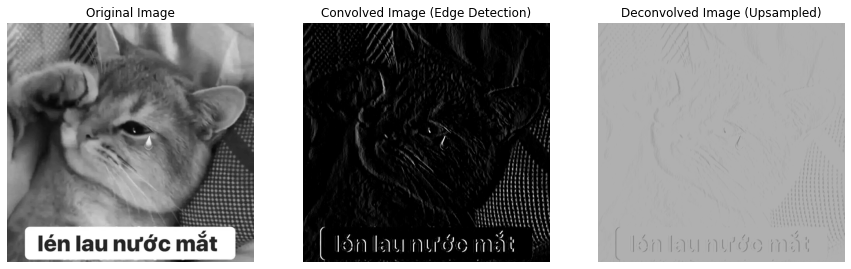

In [3]:
# Define a 3x3 edge detection kernel (Sobel X filter)
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Create LeNet model instance
lenet = LeNet(kernel)

# Run the model with an image
image_path = "cat.png"  # Change this to your image path
lenet.forward(image_path)